In [1]:
import json
import argparse
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
from tqdm import tqdm
import openai
import time

start_time = time.time()

PATH = "./regenerated/results_eli5.json"
METHOD = "Cosine Similarity"
DATA = "ELI5_Minimum_600"

#! Certify
openai.api_key = "API_KEY"
os.environ['AZURE_OPENAI_ENDPOINT'] = "API_ENDPOINT"
openai.api_type = "azure"
openai.api_version = "API_DATE"


print("Loading Data...")
#! Load Data from file
data = None
with open(PATH, "r") as f:
    data = json.load(f)
print(f"{len(data)} generated texts loaded.")

Loading Data...
2986 generated texts loaded.


In [2]:
from sentence_transformers import util
import statistics
from nltk.stem.porter import PorterStemmer
from utils import tokenize
import torch

human_scores = []
ai_scores = []

for idx in tqdm(range(len(data))):
	current_data = []
	if data[idx]["masked_generated"] == None or len(data[idx]["masked_original"]) == 0: continue

	tokenized_original = ' '.join(tokenize(data[idx]["masked_original"], stemmer=PorterStemmer()))
	embedding_original = torch.tensor(openai.embeddings.create(
		model="embeddings-ada2",
		input=[tokenized_original]
	).data[0].embedding)
	
	for generated_sample in data[idx]["masked_generated"]:
		if generated_sample == None: continue
		tokenized_generated = ' '.join(tokenize(generated_sample, stemmer=PorterStemmer()))
		try:
			embedding_generated = torch.tensor(openai.embeddings.create(
				model="embeddings-ada2",
				input=[tokenized_generated]
			).data[0].embedding)
		except Exception as e:
			print(e)
			continue

		res = util.pytorch_cos_sim(embedding_original, embedding_generated)
		current_data.append(res.item())
	
	if len(current_data) == 0: continue
	if data[idx]["type"] == "ai":
		ai_scores.append(statistics.mean(current_data))
	else:
		human_scores.append(statistics.mean(current_data))

  4%|▎         | 107/2986 [05:37<2:35:20,  3.24s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


  6%|▌         | 175/2986 [09:11<2:27:49,  3.16s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


  6%|▌         | 177/2986 [09:14<1:52:53,  2.41s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


  8%|▊         | 227/2986 [11:51<2:23:43,  3.13s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

  8%|▊         | 228/2986 [11:54<2:18:57,  3.02s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


  8%|▊         | 232/2986 [12:06<2:21:12,  3.08s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


  8%|▊         | 250/2986 [13:02<2:23:20,  3.14s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

  8%|▊         | 251/2986 [13:05<2:18:35,  3.04s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 10%|█         | 309/2986 [16:07<2:19:01,  3.12s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 13%|█▎        | 381/2986 [19:54<2:15:55,  3.13s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 16%|█▋        | 488/2986 [25:29<2:09:48,  3.12s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 16%|█▋        | 489/2986 [25:32<2:08:15,  3.08s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 18%|█▊        | 533/2986 [27:50<2:08:24,  3.14s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 18%|█▊        | 534/2986 [27:53<2:05:16,  3.07s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 20%|██        | 603/2986 [31:33<2:04:41,  3.14s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 20%|██        | 604/2986 [31:36<2:01:18,  3.06s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 22%|██▏       | 652/2986 [34:06<2:00:17,  3.09s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 23%|██▎       | 672/2986 [35:08<2:02:26,  3.17s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 23%|██▎       | 691/2986 [36:08<2:01:02,  3.16s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 23%|██▎       | 692/2986 [36:10<1:56:56,  3.06s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 25%|██▍       | 733/2986 [38:18<1:57:37,  3.13s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 25%|██▍       | 739/2986 [38:37<1:58:08,  3.15s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 25%|██▍       | 740/2986 [38:40<1:54:52,  3.07s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 29%|██▉       | 859/2986 [44:53<1:49:55,  3.10s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 32%|███▏      | 963/2986 [50:15<1:43:33,  3.07s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 32%|███▏      | 964/2986 [50:18<1:42:32,  3.04s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 33%|███▎      | 989/2986 [51:35<1:42:25,  3.08s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 33%|███▎      | 997/2986 [52:00<1:44:41,  3.16s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 33%|███▎      | 998/2986 [52:03<1:40:45,  3.04s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 35%|███▌      | 1050/2986 [54:45<1:40:09,  3.10s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 36%|███▌      | 1062/2986 [55:22<1:39:06,  3.09s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 36%|███▌      | 1063/2986 [55:25<1:38:30,  3.07s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 38%|███▊      | 1122/2986 [58:29<1:36:58,  3.12s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 38%|███▊      | 1135/2986 [59:09<1:35:26,  3.09s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 39%|███▉      | 1159/2986 [1:00:24<1:33:50,  3.08s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 39%|███▉      | 1163/2986 [1:00:36<1:33:16,  3.07s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 42%|████▏     | 1246/2986 [1:04:53<1:30:11,  3.11s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 43%|████▎     | 1273/2986 [1:06:13<1:22:12,  2.88s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 45%|████▍     | 1340/2986 [1:09:43<1:33:12,  3.40s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 46%|████▌     | 1361/2986 [1:10:49<1:23:46,  3.09s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 46%|████▌     | 1362/2986 [1:10:52<1:21:12,  3.00s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 47%|████▋     | 1404/2986 [1:13:03<1:22:35,  3.13s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 49%|████▉     | 1478/2986 [1:16:53<1:17:23,  3.08s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 50%|█████     | 1506/2986 [1:18:18<1:17:25,  3.14s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 50%|█████     | 1507/2986 [1:18:21<1:14:51,  3.04s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 52%|█████▏    | 1550/2986 [1:20:36<1:16:23,  3.19s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 54%|█████▍    | 1621/2986 [1:24:18<1:12:07,  3.17s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 54%|█████▍    | 1622/2986 [1:24:21<1:10:14,  3.09s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 55%|█████▌    | 1649/2986 [1:25:44<1:23:20,  3.74s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 56%|█████▌    | 1675/2986 [1:27:06<1:09:13,  3.17s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 57%|█████▋    | 1714/2986 [1:29:06<1:07:59,  3.21s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 58%|█████▊    | 1723/2986 [1:29:35<1:07:04,  3.19s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 58%|█████▊    | 1724/2986 [1:29:37<1:04:35,  3.07s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 58%|█████▊    | 1737/2986 [1:30:19<1:06:41,  3.20s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 59%|█████▉    | 1763/2986 [1:31:38<1:03:31,  3.12s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 59%|█████▉    | 1764/2986 [1:31:41<1:02:50,  3.09s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 59%|█████▉    | 1765/2986 [1:31:44<1:03:13,  3.11s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 61%|██████    | 1816/2986 [1:34:27<1:01:36,  3.16s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 61%|██████▏   | 1836/2986 [1:35:52<1:10:31,  3.68s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 62%|██████▏   | 1851/2986 [1:37:07<1:28:01,  4.65s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 62%|██████▏   | 1854/2986 [1:37:22<1:28:20,  4.68s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 64%|██████▍   | 1920/2986 [1:42:43<1:37:10,  5.47s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 65%|██████▌   | 1948/2986 [1:44:50<1:21:10,  4.69s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 66%|██████▌   | 1956/2986 [1:45:25<1:27:27,  5.10s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 66%|██████▌   | 1957/2986 [1:45:29<1:22:21,  4.80s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 66%|██████▌   | 1963/2986 [1:46:01<1:29:22,  5.24s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 66%|██████▌   | 1964/2986 [1:46:04<1:17:51,  4.57s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 66%|██████▌   | 1971/2986 [1:46:32<1:13:29,  4.34s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 66%|██████▌   | 1972/2986 [1:46:38<1:18:45,  4.66s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 68%|██████▊   | 2035/2986 [1:51:37<1:19:25,  5.01s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 69%|██████▉   | 2064/2986 [1:53:54<1:22:13,  5.35s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 69%|██████▉   | 2069/2986 [1:54:10<59:59,  3.93s/it]  

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 69%|██████▉   | 2070/2986 [1:54:13<55:10,  3.61s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 69%|██████▉   | 2073/2986 [1:54:23<50:30,  3.32s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 70%|██████▉   | 2076/2986 [1:54:46<1:39:33,  6.56s/it]

Error code: 429 - {'error': {'code': '429', 'message': 'Requests to the Get a vector representation of a given input that can be easily consumed by machine learning models and algorithms. Operation under Azure OpenAI API version API_DATE have exceeded call rate limit of your current OpenAI S0 pricing tier. Please retry after 1 second. Please go here: https://aka.ms/oai/quotaincrease if you would like to further increase the default rate limit.'}}


 70%|██████▉   | 2079/2986 [1:55:01<1:24:22,  5.58s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 70%|███████   | 2095/2986 [1:56:19<1:09:50,  4.70s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 71%|███████   | 2112/2986 [1:57:32<1:06:31,  4.57s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 71%|███████   | 2113/2986 [1:57:37<1:05:13,  4.48s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 72%|███████▏  | 2146/2986 [2:00:18<1:16:59,  5.50s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 73%|███████▎  | 2185/2986 [2:03:29<1:06:31,  4.98s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 73%|███████▎  | 2186/2986 [2:03:32<59:38,  4.47s/it]  

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 76%|███████▋  | 2284/2986 [2:11:11<1:01:19,  5.24s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 77%|███████▋  | 2285/2986 [2:11:14<52:55,  4.53s/it]  

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 77%|███████▋  | 2303/2986 [2:12:39<51:55,  4.56s/it]  

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 77%|███████▋  | 2304/2986 [2:12:42<46:02,  4.05s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 79%|███████▊  | 2347/2986 [2:16:11<55:03,  5.17s/it]  

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 79%|███████▊  | 2351/2986 [2:16:27<45:40,  4.32s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 79%|███████▉  | 2352/2986 [2:16:30<40:59,  3.88s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 79%|███████▉  | 2355/2986 [2:16:44<47:57,  4.56s/it]

Error code: 429 - {'error': {'code': '429', 'message': 'Requests to the Get a vector representation of a given input that can be easily consumed by machine learning models and algorithms. Operation under Azure OpenAI API version API_DATE have exceeded call rate limit of your current OpenAI S0 pricing tier. Please retry after 1 second. Please go here: https://aka.ms/oai/quotaincrease if you would like to further increase the default rate limit.'}}


 79%|███████▉  | 2362/2986 [2:17:18<50:23,  4.85s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 79%|███████▉  | 2363/2986 [2:17:21<44:26,  4.28s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 79%|███████▉  | 2371/2986 [2:17:46<30:27,  2.97s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 81%|████████  | 2405/2986 [2:20:24<46:26,  4.80s/it]  

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 81%|████████  | 2406/2986 [2:20:26<40:40,  4.21s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 81%|████████  | 2407/2986 [2:20:30<37:36,  3.90s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 81%|████████  | 2414/2986 [2:21:01<50:17,  5.27s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 81%|████████  | 2415/2986 [2:21:04<43:17,  4.55s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 81%|████████▏ | 2430/2986 [2:22:19<51:29,  5.56s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 81%|████████▏ | 2431/2986 [2:22:22<43:54,  4.75s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 83%|████████▎ | 2472/2986 [2:25:39<39:36,  4.62s/it]  

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 83%|████████▎ | 2480/2986 [2:26:18<47:39,  5.65s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 83%|████████▎ | 2490/2986 [2:27:05<39:34,  4.79s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 85%|████████▍ | 2537/2986 [2:31:08<39:34,  5.29s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 86%|████████▌ | 2566/2986 [2:33:37<37:18,  5.33s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 86%|████████▌ | 2568/2986 [2:33:43<29:15,  4.20s/it]

Error code: 429 - {'error': {'code': '429', 'message': 'Requests to the Get a vector representation of a given input that can be easily consumed by machine learning models and algorithms. Operation under Azure OpenAI API version API_DATE have exceeded call rate limit of your current OpenAI S0 pricing tier. Please retry after 1 second. Please go here: https://aka.ms/oai/quotaincrease if you would like to further increase the default rate limit.'}}


 87%|████████▋ | 2584/2986 [2:35:12<34:46,  5.19s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 87%|████████▋ | 2585/2986 [2:35:18<37:24,  5.60s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 87%|████████▋ | 2591/2986 [2:35:50<37:05,  5.63s/it]

Error code: 429 - {'error': {'code': '429', 'message': 'Requests to the Get a vector representation of a given input that can be easily consumed by machine learning models and algorithms. Operation under Azure OpenAI API version API_DATE have exceeded call rate limit of your current OpenAI S0 pricing tier. Please retry after 1 second. Please go here: https://aka.ms/oai/quotaincrease if you would like to further increase the default rate limit.'}}


 87%|████████▋ | 2606/2986 [2:36:57<25:59,  4.10s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 89%|████████▉ | 2657/2986 [2:41:06<29:43,  5.42s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 90%|█████████ | 2692/2986 [2:43:40<29:46,  6.08s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 91%|█████████ | 2708/2986 [2:44:50<20:02,  4.33s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 91%|█████████ | 2712/2986 [2:45:10<21:29,  4.71s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 93%|█████████▎| 2777/2986 [2:50:30<20:03,  5.76s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 93%|█████████▎| 2782/2986 [2:50:55<16:28,  4.85s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 93%|█████████▎| 2783/2986 [2:50:57<14:23,  4.25s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 95%|█████████▌| 2838/2986 [2:55:05<07:50,  3.18s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 95%|█████████▌| 2850/2986 [2:55:59<13:08,  5.80s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 96%|█████████▌| 2852/2986 [2:56:10<12:47,  5.73s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 96%|█████████▌| 2855/2986 [2:56:22<09:43,  4.45s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 96%|█████████▌| 2856/2986 [2:56:25<08:34,  3.96s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 96%|█████████▌| 2862/2986 [2:56:46<08:27,  4.09s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 96%|█████████▌| 2871/2986 [2:57:31<07:47,  4.06s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_reques

 96%|█████████▌| 2873/2986 [2:57:39<07:27,  3.96s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 97%|█████████▋| 2885/2986 [2:58:33<06:28,  3.85s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 98%|█████████▊| 2917/2986 [3:01:19<06:28,  5.63s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


 98%|█████████▊| 2919/2986 [3:01:26<05:13,  4.68s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


100%|█████████▉| 2972/2986 [3:05:40<01:10,  5.04s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


100%|█████████▉| 2973/2986 [3:05:43<00:57,  4.45s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


100%|█████████▉| 2981/2986 [3:06:26<00:27,  5.56s/it]

Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}
Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}


100%|██████████| 2986/2986 [3:06:43<00:00,  3.75s/it]


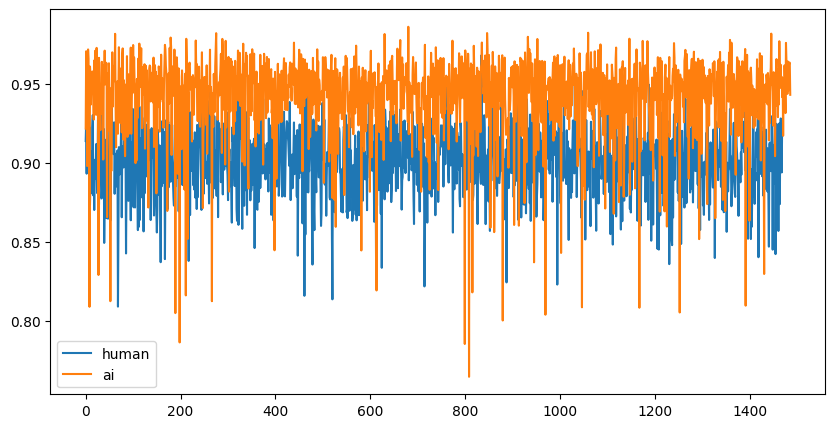

In [3]:
#! Plot Results
plt.figure(figsize=(10, 5))
plt.plot(human_scores, label='human')
plt.plot(ai_scores, label='ai')
plt.legend()
plt.show()

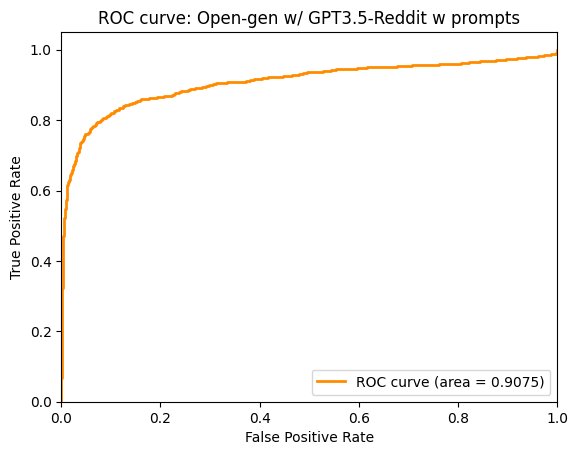

TPR at 1% FPR: 0.38417242573527166


In [4]:
#! ROC Curve Plotting
def plot_roc_curve(human_scores, gpt_scores):
    # Data
    A = human_scores
    B = gpt_scores
    # Combine scores and true labels
    scores = A + B
    labels = [0] * len(A) + [1] * len(B)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)
    # Calculate AUC (Area Under Curve)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Open-gen w/ GPT3.5-Reddit w prompts' )
    plt.legend(loc="lower right")
    plt.show()

    # find the closest fpr more than 1% fpr
    fpr_setting = 0.01
    coords1 = (0, 0)
    for idx, fpr_ in enumerate(fpr):
        if fpr_ > fpr_setting:
            coords1 = (float(fpr[idx]), float(tpr[idx]))
            break
    
    coords2 = (0, 0)
    for idx, fpr_ in enumerate(reversed(fpr)):
        if fpr_ < fpr_setting:
            coords2 = (float(fpr[len(fpr) - idx - 1]), float(fpr[len(fpr) - idx - 1]))
            break

    # (x1, y1) and (x2, y2)
    # Gradient = (y2 - y1) / (x2 - x1)
    # y = [(y2 - y1) / (x2 - x1)] (0.01 - x2) + y2
    tpr_at_one_fpr = ((coords2[1] - coords1[1]) / (coords2[0] - coords1[0])) * (fpr_setting - coords2[0]) + coords2[1]
    print(f"TPR at 1% FPR: {tpr_at_one_fpr}")

    json.dump([(fpr[i], tpr[i], thresholds[i]) for i in range(len(fpr))], open(f"results.json", "w+"))

plot_roc_curve(human_scores, ai_scores)

In [5]:
# Save Results
import json

if not os.path.exists(f"./results/{DATA}"):
    os.makedirs(f"./results/{DATA}")

with open(f"./results/{DATA}/{METHOD}.json", "w+") as f:
	json.dump({"ai_scores": ai_scores, "human_scores": human_scores, "time": time.time() - start_time}, f)